<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 2nd exercise: <font color="#C70039">Work with Boxplots for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Lena Pickartz (11330741)
* Date: 23.10.2024

<img src="https://r-graph-gallery.com/img/other/boxplot_explanation.png" style="float: center;" width="800">
<img src="https://i2.wp.com/upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/550px-Boxplot_vs_PDF.svg.png?w=578" style="float: center;" width="800">


---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using boxplots to detect anomalies. Try to interpret the boxplot.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
4. take the three data sets from exercize 1 and create a boxplot for each of them
5. interpret the visual results and describe them
6. how can you test your data for being normally distributed?
-----------------------------------------------------------------------------------

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
np.random.seed(1)


In [2]:
# multiply and add by random numbers to get some real values
# randn generates samples from the normal distribution (important - see below)
random_data = np.random.randn(50000)  * 20 + 20

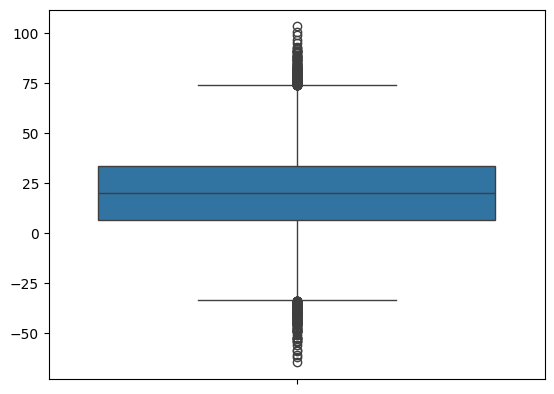

In [3]:
sns.boxplot(data=random_data)
plt.show()

# Data Set 1: Resting Blood Pressure

In [9]:
import pandas as pd

#Access the dataset (Source = https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)
url_1 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/heart.csv'

# Load the dataset
df_1 = pd.read_csv(url_1)

# Extract the resting blood pressure (in mm Hg) column and drop missing values
heart_rate_data = df_1['trtbps'].dropna()

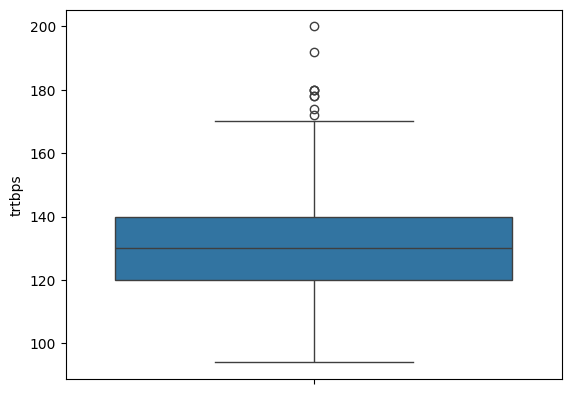

In [10]:
sns.boxplot(data=heart_rate_data)
plt.show()

# Observation
The median value of the resting blood pressure is 130 mm Hg, as indicated by the horizontal line inside the box. The whiskers show the max value is 170 mm Hg and min value is 90 mm Hg. The interquartile range (IQR) is 140 - 120 = 20 mm Hg.  The plot shows some outliers, represented by individual circles. The outliers are located on the upper side of the box, which means that there are a few higher values compared to the majority of the data.

# Data Set 2: Weight of Oranges

In [11]:
#Access the dataset (Source = https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit)
url_2 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/citrus.csv'

# Load the dataset
df_2 = pd.read_csv(url_2)

# Extract the weight column and drop missing values
orange_weight_data = df_2['weight'].dropna()

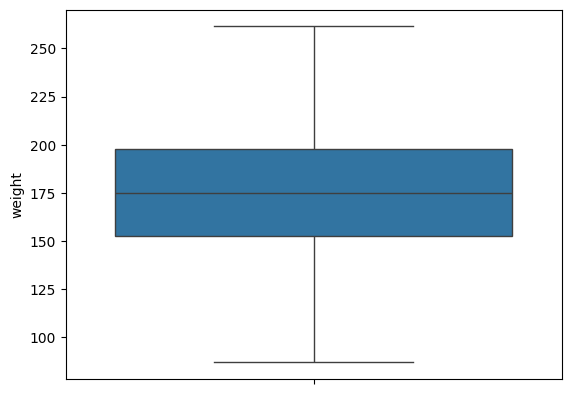

In [12]:
sns.boxplot(data=orange_weight_data)
plt.show()

The median value of the weight of oranges is 175 g, as indicated by the horizontal line inside the box. The whiskers show that the max value is 260 g and mim value is 90 g. The IQR is approx. 200 g - 150 g = 50 g. The plot shows no outliers.

# Data Set 3: Renewable Power Production France

In [13]:
#Access the dataset (Source = https://www.kaggle.com/datasets/henriupton/wind-solar-electricity-production)
url_3 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/intermittent-renewables-production-france.csv'

# Load the dataset
df_3 = pd.read_csv(url_3)

# Extract the production in MWh column and drop missing values
renewable_energy_data = df_3['Production'].dropna()

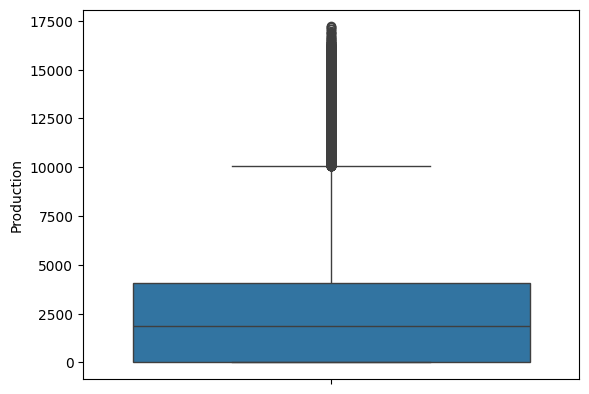

In [16]:
sns.boxplot(data=renewable_energy_data)
plt.show()

The median value of the renewable energy production is around 1,000 MWh, as indicated by the horizontal line inside the box. The minimum value is around 0 MWh, and the maximum value is around 17,500 MWh. There are a lot of outliers on the upper side of the plot. The IQR is approx. 4,000 MWh - 0 MWh = 4,000 MWh

# How to test your data on being distributed normally
There are multiple statistical methods that can be run for normal distribution:

Either with the help of visualisations and oberservations, e.g. with
* histogram,
* box plot,
* P–P Plot, and
* Q–Q Plot

or with statistics tests, the most common ones are the
* Shapiro-Wilk test (for small sample sizes < 50), and the
* Kolmogorov-Smirnov test (for sample sizes < 50).

For both of the above tests, null hypothesis states that data are taken from normal distributed population.

Source:
Mishra, P., Pandey, C. M., Singh, U., Gupta, A., Sahu, C., & Keshri, A. (2019). Descriptive statistics and normality tests for statistical data. Annals of cardiac anaesthesia, 22(1), 67–72. https://doi.org/10.4103/aca.ACA_157_18

# Kolmogorov-Smirnov Test for Orange Weight Dataset
As the Orange Weight Dataset can be considered the closest to a normal distribution, we will run a Kolmogorov-Smirnov test. For this we will make us of the scipy-library.

In [17]:
import scipy.stats as stats

# Perform the Kolmogorov-Smirnov test on orange weight data
statistic, p_value = stats.kstest(orange_weight_data, 'norm')

# Print the results
print("Kolmogorov-Smirnov statistic:", statistic)
print("P-value:", p_value)

Kolmogorov-Smirnov statistic: 1.0
P-value: 0.0
